# Life Expectancy WHO Prediction

### **Import Library**

In [1]:
#Basic Library
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings


warnings.filterwarnings("ignore")


### **Data Preprocessing**

#### **Load Data**

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### **Data Null Values & Data Types**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- Terdapat 2 atribut yang bertipe data object : **Country** dan **Status**
- Terdapat beberapa atribut yang memiliki nilai **null**
- Mayoritas atribut memiliki tipe data numerik, kita dapat fokus dalam mengvisualisasikan atribut tersebut
- Beberapa nama atribut memiliki spasi yang tidak diperlukan

**Remove White Space**

In [4]:
df.columns = df.columns.str.strip()

**Handling Null Values**

In [5]:
# Missing data
for i in df.columns:
    null_rate = (df[i].isna().sum() / len(df) * 100)
    if null_rate > 0 :
        print(f"Nama Atribut : {i}")
        print(f"Null Rate    : {round(null_rate,2)}")
        print(f"Jumlah Null  : {df[i].isna().sum()}\n")

Nama Atribut : Life expectancy
Null Rate    : 0.34
Jumlah Null  : 10

Nama Atribut : Adult Mortality
Null Rate    : 0.34
Jumlah Null  : 10

Nama Atribut : Alcohol
Null Rate    : 6.6
Jumlah Null  : 194

Nama Atribut : Hepatitis B
Null Rate    : 18.82
Jumlah Null  : 553

Nama Atribut : BMI
Null Rate    : 1.16
Jumlah Null  : 34

Nama Atribut : Polio
Null Rate    : 0.65
Jumlah Null  : 19

Nama Atribut : Total expenditure
Null Rate    : 7.69
Jumlah Null  : 226

Nama Atribut : Diphtheria
Null Rate    : 0.65
Jumlah Null  : 19

Nama Atribut : GDP
Null Rate    : 15.25
Jumlah Null  : 448

Nama Atribut : Population
Null Rate    : 22.19
Jumlah Null  : 652

Nama Atribut : thinness  1-19 years
Null Rate    : 1.16
Jumlah Null  : 34

Nama Atribut : thinness 5-9 years
Null Rate    : 1.16
Jumlah Null  : 34

Nama Atribut : Income composition of resources
Null Rate    : 5.68
Jumlah Null  : 167

Nama Atribut : Schooling
Null Rate    : 5.55
Jumlah Null  : 163



In [6]:
df_Null = (df.isna().sum() / len(df) * 100).sort_values()
df_Null.drop(df_Null.loc[df_Null == 0].index,inplace=True)

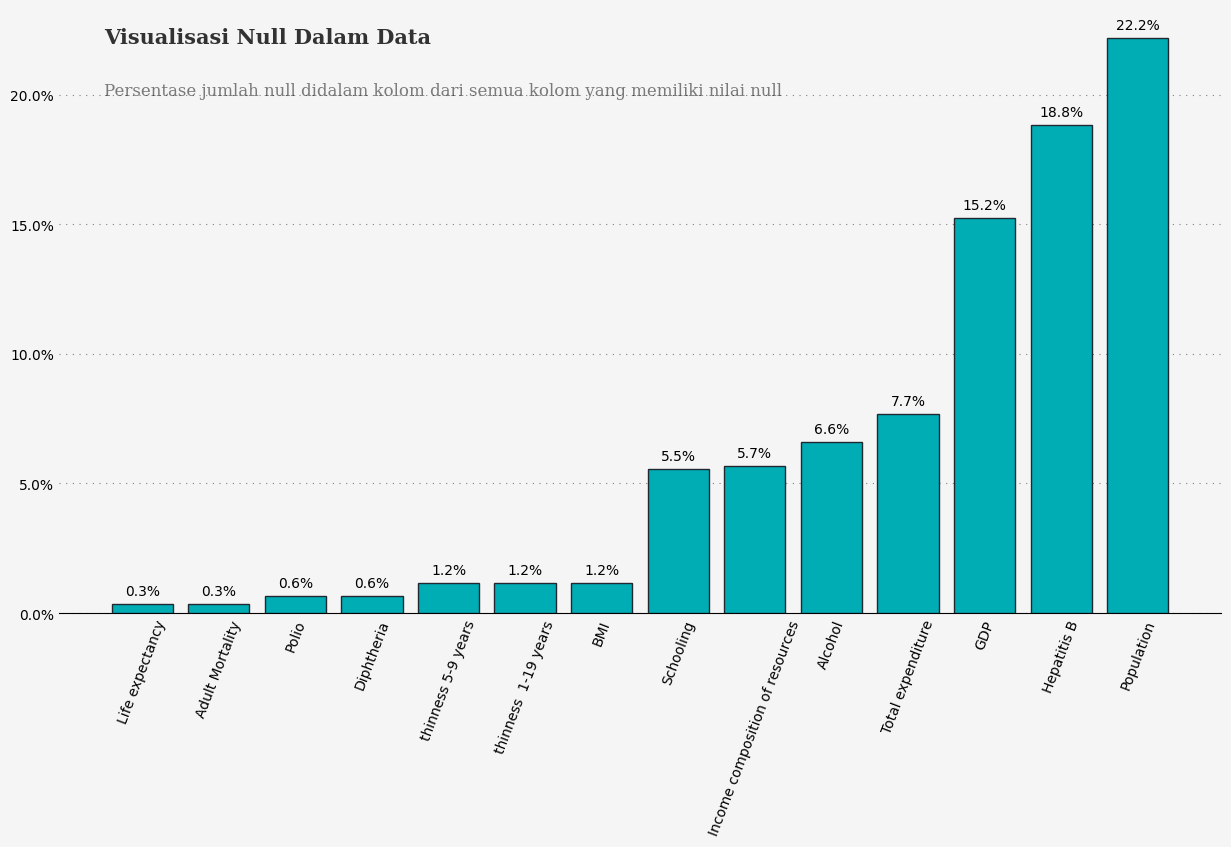

In [7]:
fig, ax = plt.subplots(figsize = (15,8), dpi = 100)
fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f6f5f5')


x = np.arange(1,len(df_Null)+1)
ax.text(0.5, 22, 'Visualisasi Null Dalam Data', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
ax.text(0.5, 20, 'Persentase jumlah null didalam kolom dari semua kolom yang memiliki nilai null', fontsize=12, fontweight='light', fontfamily='serif',alpha=0.5)
ax.grid(color='gray', linestyle=':', zorder=0,axis='y',  dashes=(1,5))
ax.bar(x, height=df_Null, color="#00ADB5",zorder=3,edgecolor='#222831')
ax.set_xticks(x)
ax.set_xticklabels(df_Null.index,rotation=69)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(5))



for i,j in enumerate(df_Null):
    ax.annotate(f'{j:0.1f}%',xy=(i+1, j+0.5), color='black', horizontalalignment='center', verticalalignment='center')

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

locals()["ax"].tick_params(length=0)



Karena nilai null tidak terdapat pada atribut yang bertipe kategorikal maka kita akan mengganti nilai null dengan nilai **rata - rata**

In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

**Explore Categorical Data**

In [10]:
dfCat = df.select_dtypes(include=['object'])

In [11]:
for i in dfCat.columns:
    print(f'Nama Kolom        : {i}')
    print(f"Jumlah Nilai Unik : {dfCat[i].nunique()} \n")

Nama Kolom        : Country
Jumlah Nilai Unik : 193 

Nama Kolom        : Status
Jumlah Nilai Unik : 2 



Terdapat 193 negara didalam data

#### **Statistics of Categorical and Numerical Data**

In [12]:
round (df.describe(exclude = 'object'), 2)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2938.00,2.938000e+03,2938.00,2938.00,2938.00,2938.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.51,124.08,117.93,3.92,1987.91,22.59,11467.27,19.93,160.45,23.35,2.40,23.64,5.08,13136.80,5.381546e+07,4.39,4.48,0.20,3.26
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.20,74.00,0.00,1.09,4.69,80.94,0.00,19.40,0.00,78.00,4.37,78.00,0.10,580.49,4.189172e+05,1.60,1.60,0.50,10.30
50%,2008.00,72.00,144.00,3.00,4.16,64.91,87.00,17.00,43.00,4.00,93.00,5.94,93.00,0.10,3116.56,3.675929e+06,3.40,3.40,0.66,12.10
75%,2012.00,75.60,227.00,22.00,7.39,441.53,96.00,360.25,56.10,28.00,97.00,7.33,97.00,0.80,7483.16,1.275338e+07,7.10,7.20,0.77,14.10
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


In [13]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


### **Data Visualization**

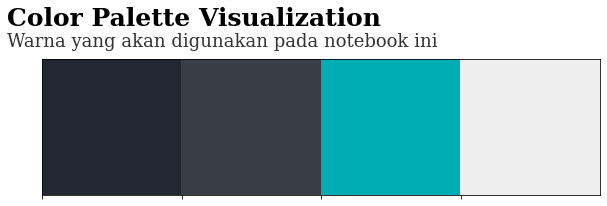

In [14]:
# color palette for visualizations
colors = ['#222831','#393E46','#00ADB5','#EEEEEE']
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette Visualization', {'font':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.60,'Warna yang akan digunakan pada notebook ini', {'font':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)
plt.show()

#### **Distribusi Status Negara**

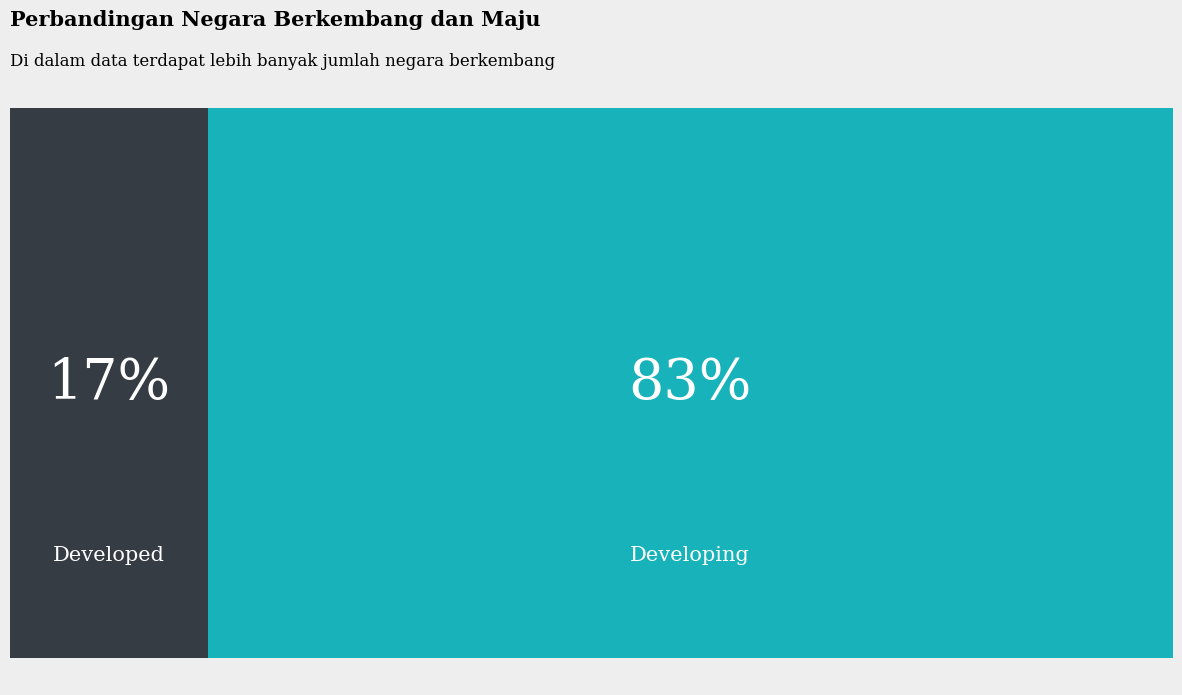

In [15]:
x = df.groupby('Status')['Status'].count()
y = len(df)

r=((x/y)).round(2)
status_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(15, 8),dpi = 100)

fig.patch.set_facecolor('#EEEEEE')

ax.set_facecolor('#EEEEEE')

ax.barh(status_ratio.index, status_ratio['Developed'], 
        color='#222831', alpha=0.9, label='Developed')
ax.barh(status_ratio.index, status_ratio['Developing'], left=status_ratio['Developed'], 
        color='#00ADB5', alpha=0.9, label='Developing')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in status_ratio.index:
    ax.annotate(f"{int(status_ratio['Developed'][i]*100)}%", 
                   xy=(status_ratio['Developed'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Developed", 
                   xy=(status_ratio['Developed'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')


for i in status_ratio.index:
    ax.annotate(f"{int(status_ratio['Developing'][i]*100)}%", 
                   xy=(status_ratio['Developed'][i]+status_ratio['Developing'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Developing", 
                   xy=(status_ratio['Developed'][i]+status_ratio['Developing'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,0.95,'Perbandingan Negara Berkembang dan Maju', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.90,'Di dalam data terdapat lebih banyak jumlah negara berkembang',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)



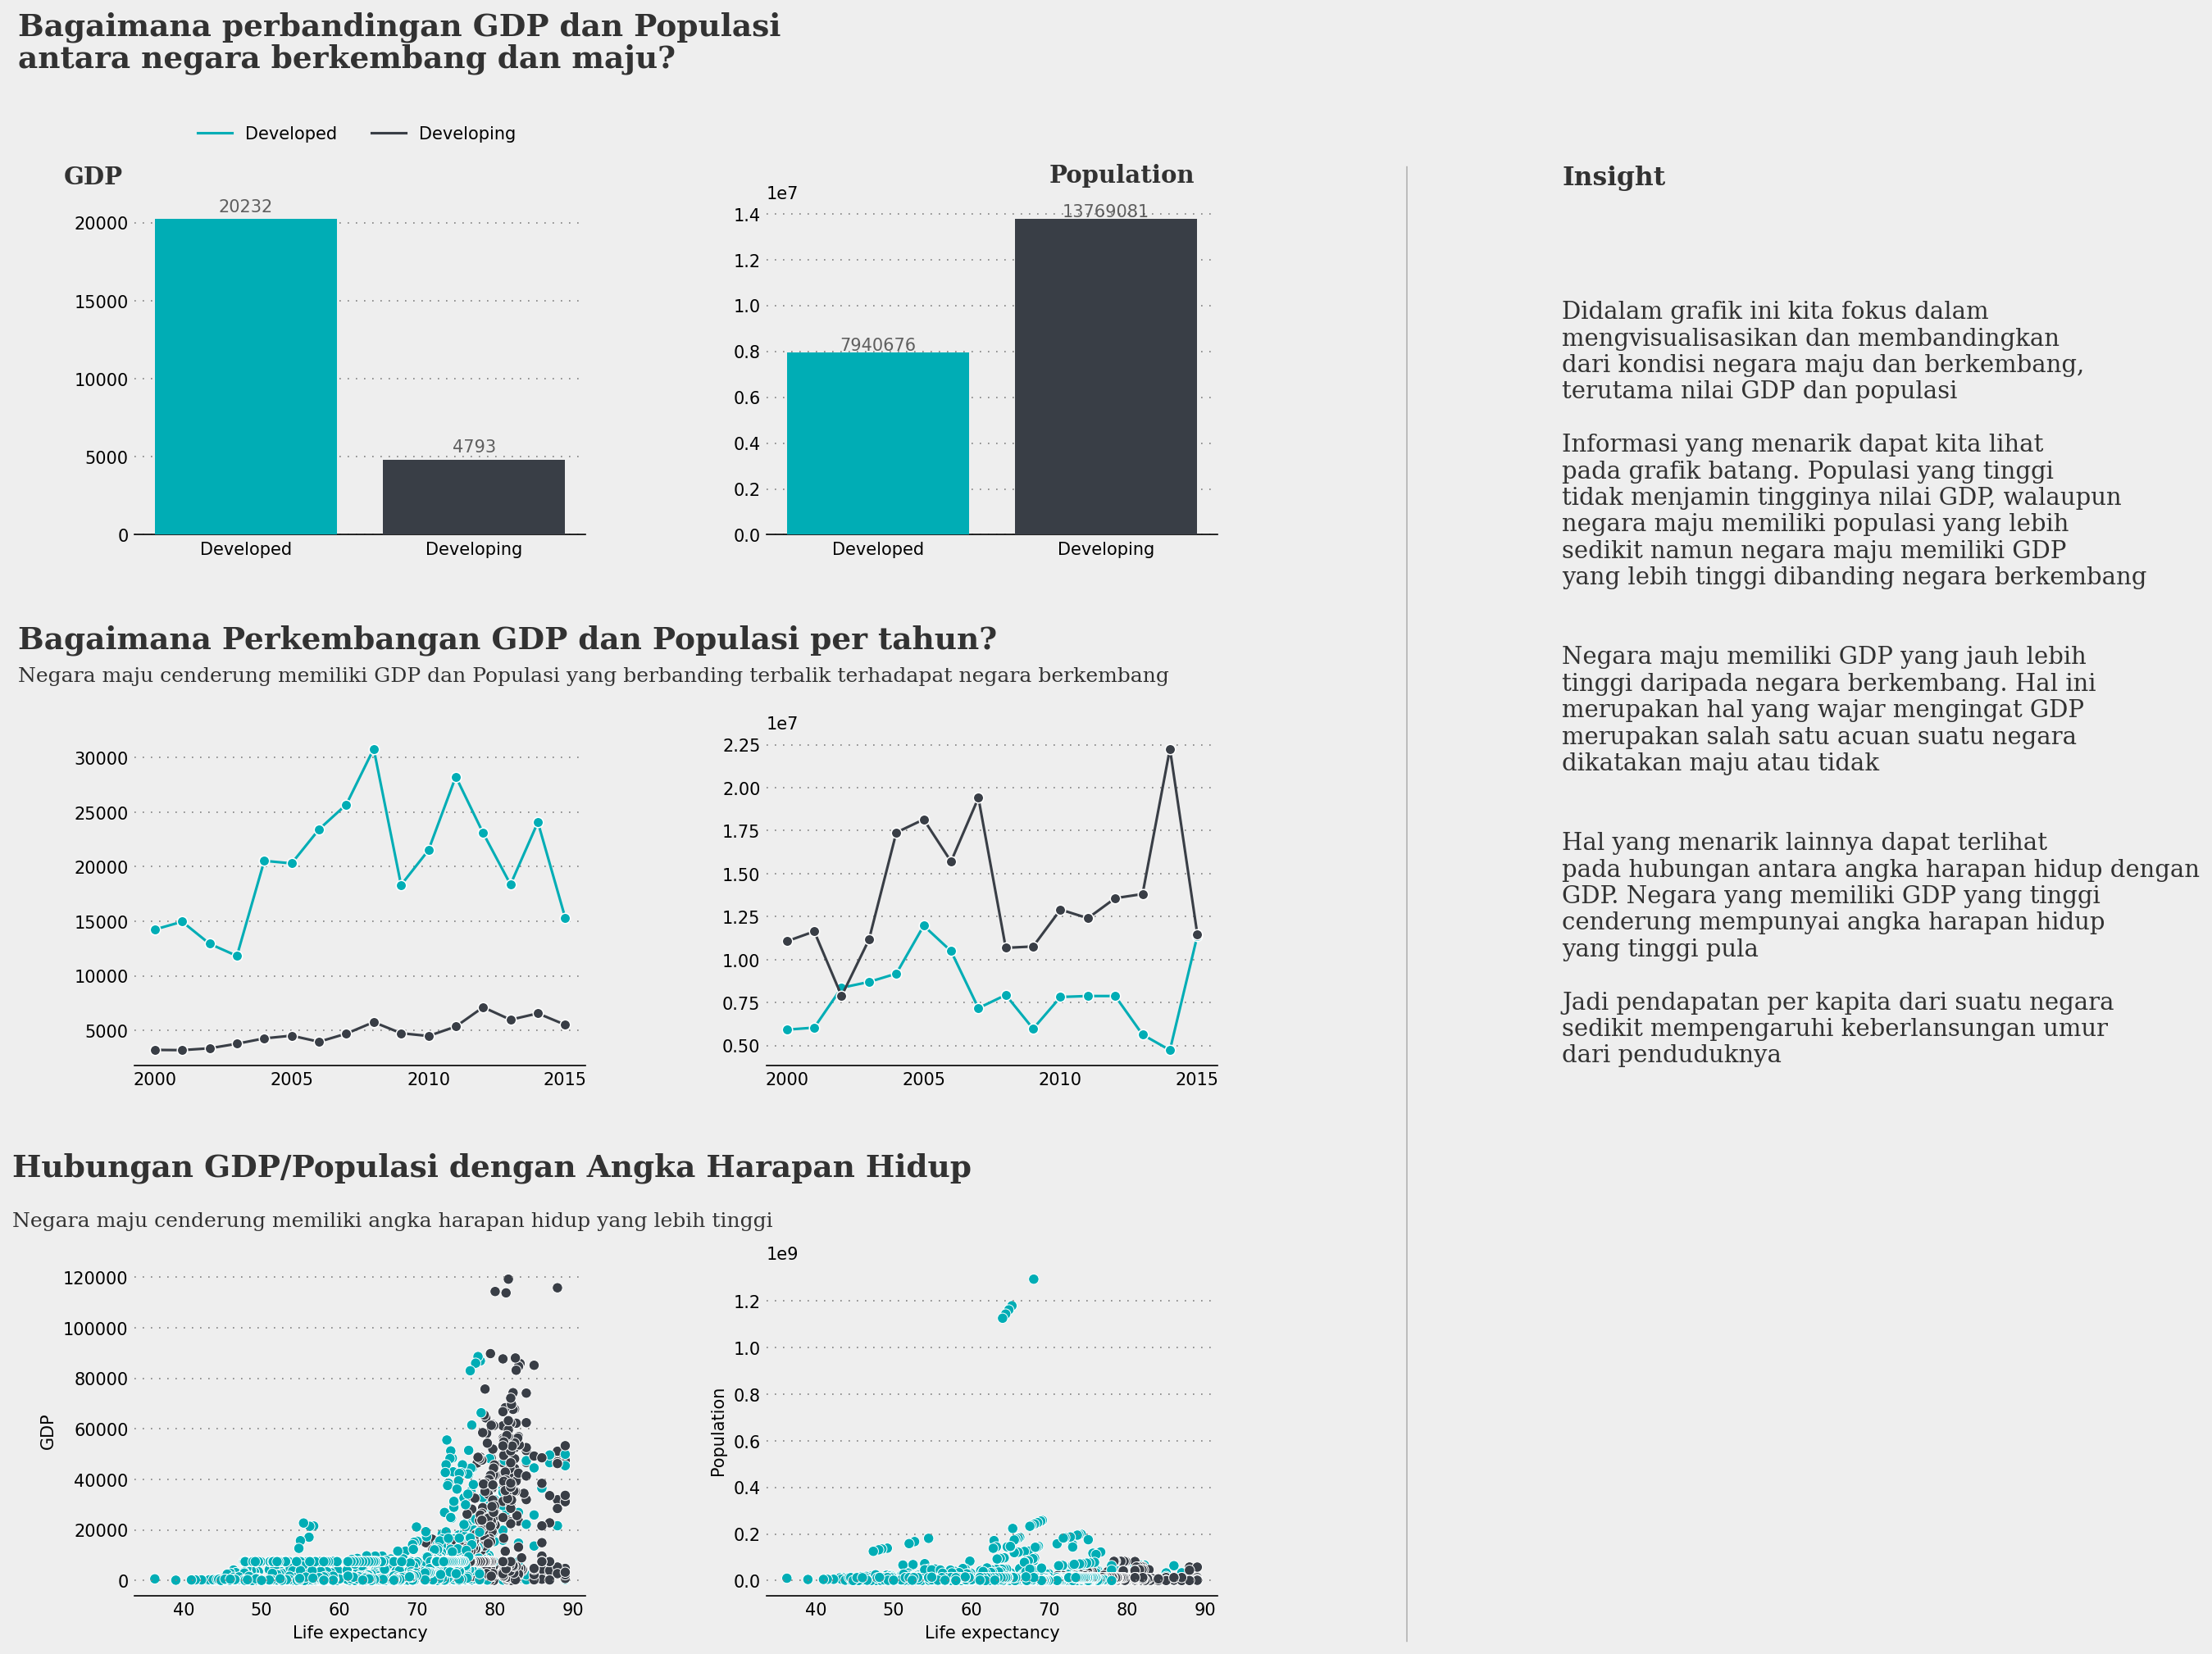

In [16]:

fig = plt.figure(figsize=(18,15), dpi=150)

fig.patch.set_facecolor('#EEEEEE')

palette = ['#00ADB5','#393E46']
ax.set_facecolor('#EEEEEE') # figure background color
gs = fig.add_gridspec(3, 3)

gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])


#GDP
ax0_y_ticks = np.arange(0, 25000, 5000)
groupdf = df.groupby('Status')['GDP','Population'].mean()
ax0.text(-1, 32000, 'Bagaimana perbandingan GDP dan Populasi', fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1, 30000, 'antara negara berkembang dan maju?', fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-0.8, 22500, 'GDP', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(groupdf.index, height=groupdf['GDP'], color=['#00ADB5','#393E46'],zorder=3)
ax0.set_yticks(ax0_y_ticks)

for i,j in enumerate(groupdf['GDP']):
    ax0.annotate(f'{j:0.0f}',xy=(i, j+500), color='black', horizontalalignment='center',alpha=0.6)


#Population
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(groupdf.index, height=groupdf['Population'], color=['#00ADB5','#393E46'],zorder=3)
ax1.text(0.75, 15369081, 'Population', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
for i,j in enumerate(groupdf['Population']):
    ax1.annotate(f'{j:0.0f}',xy=(i, j+100000), color='black', horizontalalignment='center',alpha=0.6)


#Lineplot GDP
ax2.text(1995, 40000, 'Bagaimana Perkembangan GDP dan Populasi per tahun?', fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(1995, 37000, 'Negara maju cenderung memiliki GDP dan Populasi yang berbanding terbalik terhadapat negara berkembang', fontsize=12, fontweight='light', fontfamily='serif', color="#323232")
ax2_x_ticks = np.arange(2000, 2016, 5)
groupYear = df.groupby(['Status','Year'])['GDP','Population'].mean().reset_index()
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.lineplot(data=groupYear, x="Year", y="GDP", hue="Status",ax=ax2,palette=palette,marker='o')
legend_labels, _= ax2.get_legend_handles_labels()
ax2.set_xticks(ax2_x_ticks)
ax1.legend(legend_labels, ["Developed", "Developing"], ncol=2, bbox_to_anchor=(-0.52, 1.28), facecolor='#EEEEEE', edgecolor='#EEEEEE')
ax2.get_legend().remove()


#Lineplot Population
groupYear = df.groupby(['Status','Year'])['GDP','Population'].mean().reset_index()
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.lineplot(data=groupYear, x="Year", y="Population", hue="Status",ax=ax3,palette=palette,marker='o')
ax3.set_xticks(ax2_x_ticks)
ax3.get_legend().remove()


#Scatterplot GDP
ax4.text(18, 160000, 'Hubungan GDP/Populasi dengan Angka Harapan Hidup', fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
ax4.text(18, 140000, 'Negara maju cenderung memiliki angka harapan hidup yang lebih tinggi', fontsize=12, fontweight='light', fontfamily='serif', color="#323232")
ax4.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(y = 'GDP' , x = 'Life expectancy',data=df,hue="Status",palette=palette,ax=ax4)
ax4.get_legend().remove()

#Scatterplot GDP
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(y = 'Population' , x = 'Life expectancy',data=df,hue="Status",palette=palette,ax=ax5)
ax5.get_legend().remove()

import matplotlib.lines as lines
l1 = lines.Line2D([0.7, 0.7], [0.1, 0.9], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(0.77, 0.89
         , 'Insight', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.77, 0.40, '''

Didalam grafik ini kita fokus dalam
mengvisualisasikan dan membandingkan
dari kondisi negara maju dan berkembang,
terutama nilai GDP dan populasi

Informasi yang menarik dapat kita lihat
pada grafik batang. Populasi yang tinggi
tidak menjamin tingginya nilai GDP, walaupun
negara maju memiliki populasi yang lebih 
sedikit namun negara maju memiliki GDP 
yang lebih tinggi dibanding negara berkembang 


Negara maju memiliki GDP yang jauh lebih
tinggi daripada negara berkembang. Hal ini
merupakan hal yang wajar mengingat GDP 
merupakan salah satu acuan suatu negara
dikatakan maju atau tidak


Hal yang menarik lainnya dapat terlihat
pada hubungan antara angka harapan hidup dengan
GDP. Negara yang memiliki GDP yang tinggi
cenderung mempunyai angka harapan hidup
yang tinggi pula

Jadi pendapatan per kapita dari suatu negara
sedikit mempengaruhi keberlansungan umur
dari penduduknya
'''
         , fontsize=14, fontweight='light', fontfamily='serif',color='#323232')

for s in ["top","right","left"]:
    for i in range(0,6):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,6):
        locals()["ax"+str(i)].set_facecolor('#EEEEEE')
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))      

        
for x in range(0,4):
    for y in range(0,4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")



plt.show()

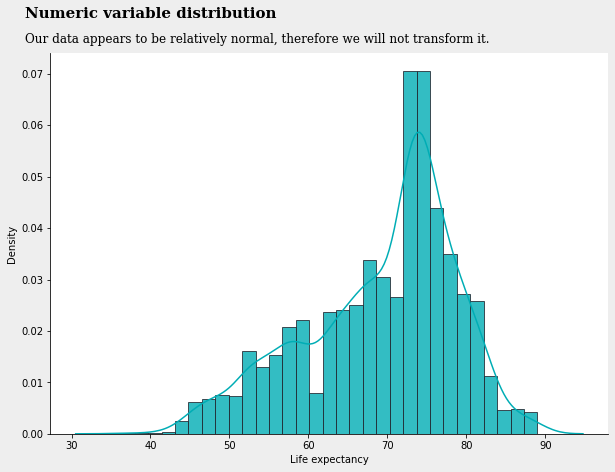

In [17]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('#EEEEEE')

fig.text(0.09, 0.95, 'Numeric variable distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.9, 'Our data appears to be relatively normal, therefore we will not transform it.', fontsize=12, fontweight='light', fontfamily='serif')
ax1 = sns.distplot(df["Life expectancy"],color='#00ADB5',hist_kws=dict(edgecolor="#222831", linewidth=1,alpha=0.8))

sns.despine()

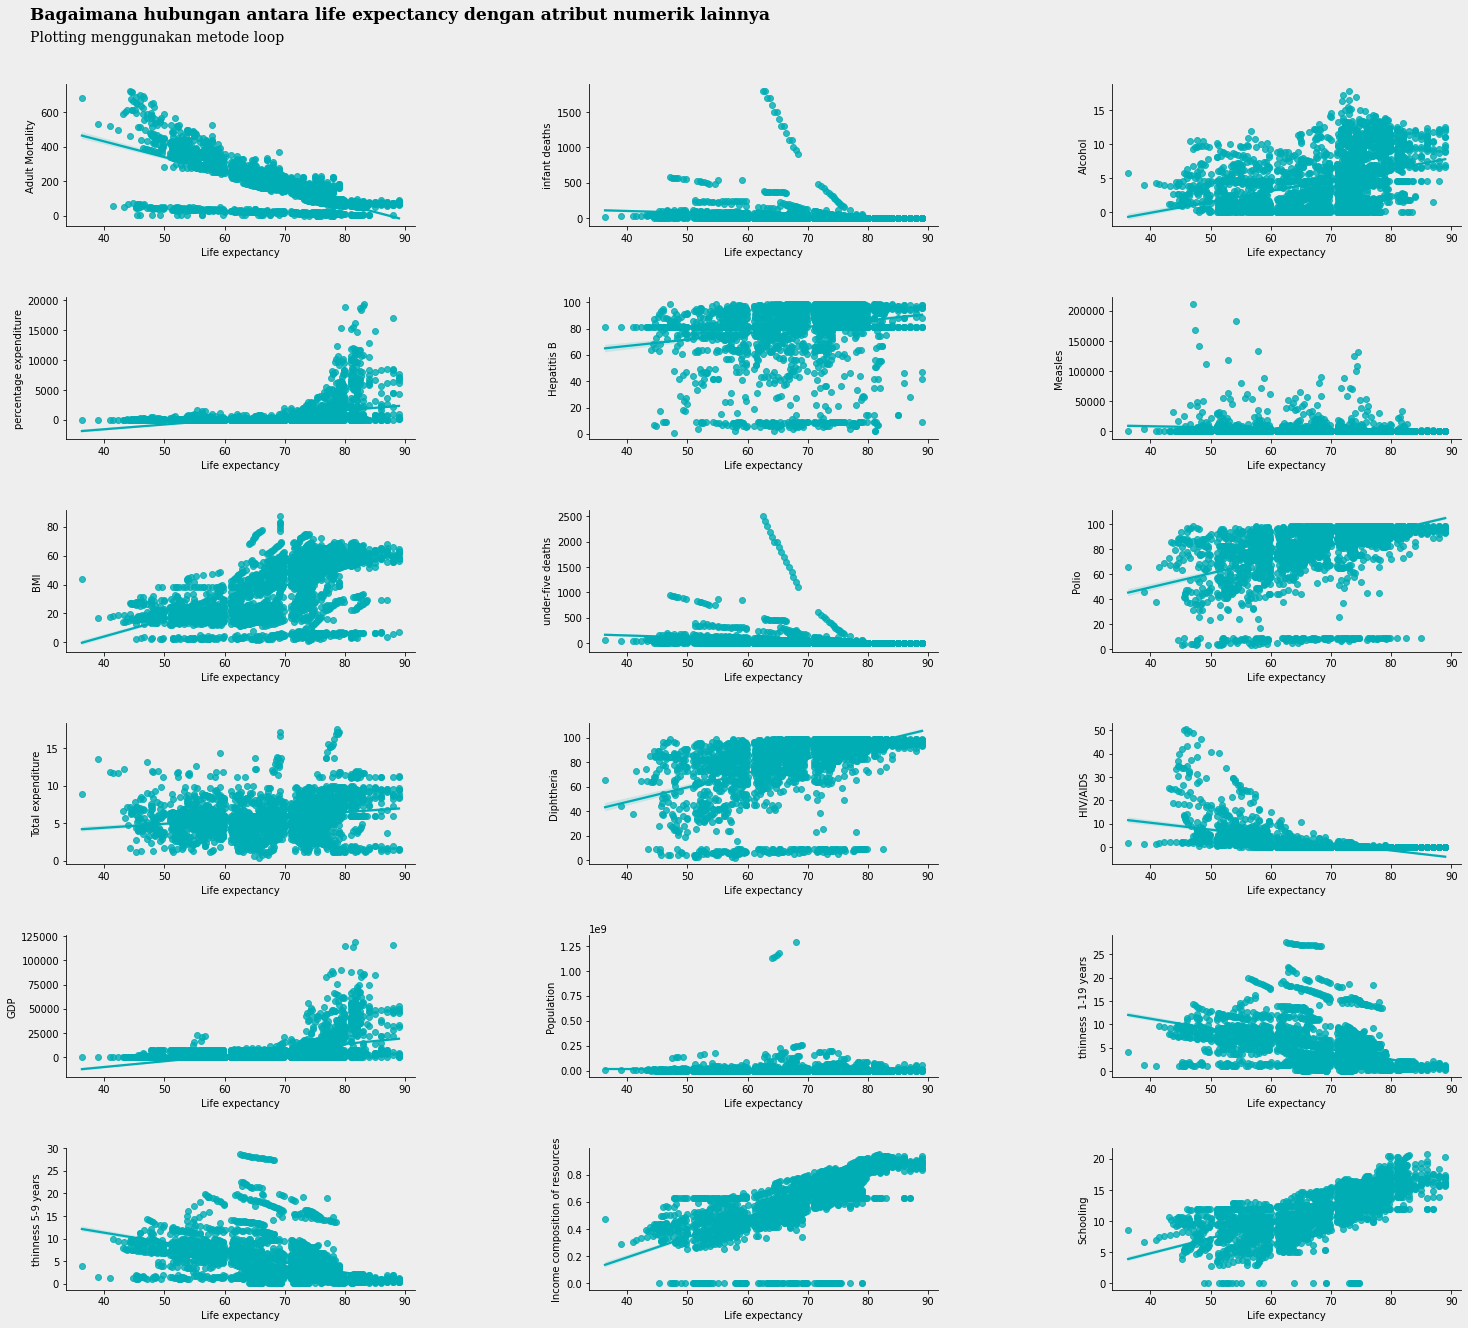

In [18]:
fig = plt.figure(figsize=(25, 30))
fig.patch.set_facecolor('#EEEEEE')
 # figure background color

dfReg = df.drop(['Country','Status','Year','Life expectancy'],axis=1)
n = 0

plt.rcParams.update({'axes.facecolor':'#EEEEEE'})

fig.text(0.105, .91, 'Bagaimana hubungan antara life expectancy dengan atribut numerik lainnya', fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.105, .90, 'Plotting menggunakan metode loop', fontsize=14, fontweight='light', fontfamily='serif')

for x in dfReg.columns:
     n += 1
     plt.subplot(8 , 3 , n)

     plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
     sns.regplot(x = df['Life expectancy'] , y = x , data = dfReg,color='#00ADB5')
     sns.despine()



  
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

### **Modelling**